<a href="https://colab.research.google.com/github/Angeal13/Food_Vision_ML/blob/main/03_Intro_to_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data
The images we are working with are from the food 101 datatset(101 different classes of food)
However we have mdoified it to only use 2 classes,pizza and stake.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded File
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-16 15:23:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.135.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   101MB/s    in 1.0s    

2021-07-16 15:23:44 (101 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



# Binary CNN Model

## Become one with the Data

### Inspecting the data:
In Cv projects usually means Visualizing many samples of the data

In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
#Walk throught the directory nad list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
#The extra file in ou rPizza_steak dir is ".DS_store"

In [ ]:
#Anothe way to find out how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize the images first let's get the class names programatically

In [ ]:
#GEt class names
import pathlib
import numpy as np

data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([
            item.name for item in data_dir.glob('*')]))#Create a list of names from the sub directories
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# visualizing images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Set up the target directory 
  target_folder=target_dir+'/'+target_class
  
  #Get arandom image path
  random_image=random.sample(os.listdir(target_folder),1)

  #read in the image adn plot ir using matplotlib
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"image Shape:{img.shape}")#Shoiw image shape
  return img

image Shape:(512, 341, 3)


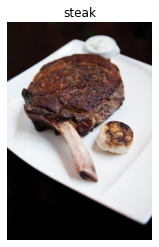

In [ ]:
#view reandom image form trainig dataset 
img=view_random_image(target_dir='pizza_steak/train',target_class='steak')

In [ ]:
#turn image sample into tensors
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 341, 3), dtype=uint8, numpy=
array([[[25, 14, 12],
        [25, 14, 12],
        [25, 14, 12],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[25, 14, 12],
        [25, 14, 12],
        [25, 14, 12],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[25, 14, 12],
        [25, 14, 12],
        [25, 14, 12],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)>

As it is well known,Ml NN preffere normalized datasets,hence for optimal results it is prefereable to normalized the sets(values 0-1). to achieve that, we must dive the images arrays by 255,which i sthe max pixel value

In [ ]:
#normlize the pixel values
#for 1 image
img/255

array([[[0.09803922, 0.05490196, 0.04705882],
        [0.09803922, 0.05490196, 0.04705882],
        [0.09803922, 0.05490196, 0.04705882],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.09803922, 0.05490196, 0.04705882],
        [0.09803922, 0.05490196, 0.04705882],
        [0.09803922, 0.05490196, 0.04705882],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.09803922, 0.05490196, 0.04705882],
        [0.09803922, 0.05490196, 0.04705882],
        [0.09803922, 0.05490196, 0.04705882],
        ...,
        [0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0.01568627, 0.01568627]],

       ...,

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.00784314, 0

## End-to-End examle

Need to build a CNN to find patters in images:
* Load the images
* preprocess the images
* Build a CNN to find patters in images
*Compile teh model
*Fit the CNN to the Training Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
#Set Seed 
tf.random.set_seed(42)

#PReprocess data(GEt all teh pixel Vauels in normalized values)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Set u path to data Directory
train_dir='/content/pizza_steak/train'
test_dir='pizza_steak/test'

#Import data form directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_Data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42
                                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Build A CNN Model
model_1=tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=10,
                               kernel_size=3,
                               activation='relu',
                               input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding='valid'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
#Compile the CNN
model_1.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
#Fit the model
history_1=model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data), 
    validation_data=valid_Data,
    validation_steps=len(valid_Data)

)

Epoch 1/5
47/47 [==============================] - 41s 202ms/step - loss: 0.5704 - accuracy: 0.7100 - val_loss: 0.4307 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4263 - accuracy: 0.8127 - val_loss: 0.3274 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3930 - accuracy: 0.8260 - val_loss: 0.3153 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3615 - accuracy: 0.8453 - val_loss: 0.3036 - val_accuracy: 0.9000
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3311 - accuracy: 0.8733 - val_loss: 0.3184 - val_accuracy: 0.8820


**Note** If the trainig epoch is taking longer than 30s,try changing to GPU Running type to improve it

## Breaking the CNN Down:
1. Become one with the data
2. Preprocessiong the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust the params ,adn improve the model
7.Repeat until satisfied

### 1. Become One with the Data

image Shape:(512, 512, 3)
image Shape:(512, 512, 3)


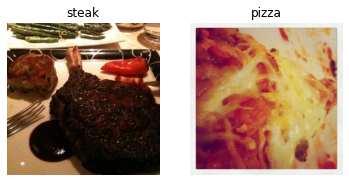

In [ ]:
#Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('pizza_steak/train','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('pizza_steak/train','pizza')

### 2. Preprocess The Data

In [ ]:
#Define  directory dataset Paths
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'


Trun the datat into **batches**

**Note:** A batch is a small subset of a dataset that the model looks at during training(preffereable 32 at a time)
Reasons are: 
* Large amounts of images might not fit into the memory of the processor(GPU)
* Trying to learn the patter in large amounts of data could result in tthe model not learning very well

In [ ]:
# Create a Train and teste data generators ans rescale them
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#Load in the Images from Dirs and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,#directory of the images
                                             target_size=(224,224),#Target Size o fthe images(heigh,width)
                                             class_mode='binary',#Type of data we are working with
                                             batch_size=32)#Size of minibatches to load data into

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Note**: The `flow_from_directory()` method takes a path of a directory and generates batches of augmented data.

### 3. Create and Compile the Baseline CNN Model
A baseline is relative model or existing result that one sets up when beginnig a machine learninig experiment ans then you keep experimenting,you trty to beat the baseline.

**Note:** In DL there is almost and infinte amount or architectures,so one of the best wasy is to starts with something simple ans see it works, asn introduce complexity as required, and compare models, and choose the best.

In [ ]:
#make Creating opur model a bit easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import  Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

**Note** Ans easies wasy to creta a model is to import the layers and their componetnts that make the NN  through the import fucntions and their respective libraries

In [ ]:
#Create the model(baseline,3 CNN)
model_2=Sequential([
        Conv2D(filters=10,
               kernel_size=3,
               strides=1,
               padding='valid',#if 'same' ,out shape= input shape,if 'valid'  output shape gets compressed
               activation='relu',
               input_shape=(224,224,3)),#Input layer(Specified input Shape)
        Conv2D(10,3,activation='relu'),
        Conv2D(10,3,activation='relu'),
        Flatten(),
        Dense(1,activation='sigmoid')#Output layer(Working with binary classification with only 1 output Neuron)

])

**Conv2D Components:**
* Filters: decide how many filter should pass over an input tensor
* Kerne Size(Filter Size): Determines the shape of the filters over teh output
* Padding: Pad the target tensor with zeros(if same),to perser input shape. Or leaves in target tensors as is(if valid),lowering output shape
*Strides: The number of steps a filter takes across an image at a time

In [ ]:
#Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


In [ ]:
#Model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the Model

In [ ]:
#cehck len of Trainig of test an train data
len(test_data),len(train_data)

(16, 47)

In [ ]:
#Fit the model
history_2=model_2.fit(
    train_data,#Combination of labes and sample data
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8385 - accuracy: 0.7047 - val_loss: 0.4314 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4110 - accuracy: 0.8173 - val_loss: 0.4057 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3280 - accuracy: 0.8607 - val_loss: 0.3557 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.1876 - accuracy: 0.9367 - val_loss: 0.3481 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1000 - accuracy: 0.9667 - val_loss: 0.4670 - val_accuracy: 0.8040


In [ ]:
model_1.evaluate(test_data),model_2.evaluate(test_data)

16/16 [==============================] - 2s 131ms/step - loss: 0.4670 - accuracy: 0.8040


([0.31838560104370117, 0.8820000290870667],
 [0.46699270606040955, 0.8040000200271606])

**Note**: Idealy th eloss curves will be similar too eachother ,when there is a large difference that might mean th emodel is **overfitting**

### 5. Adjust the Model Parameters

Fittin a ML model comes in 3 steps"
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting


Ways to induce overfittih:
* Increase number of conv layers(Make the NN deeper)
*Increase the number of conv filters
*Add another dense layer to the output of the Flattened layer

Reduce OverFitting:
* Add data augmentation
* add Regularization layers(`MaxPool2D`)
*Add more data
**Note:** Reducing overfittign is also known as **regularization**

#### Regularization

In [ ]:
#Build a new model with Regulazation
#create the model
model_3=Sequential([
        Conv2D(filters=10,
               kernel_size=3,
               strides=1,
               padding='valid',
               activation='relu',
               input_shape=(224,224,3)),
        MaxPool2D(pool_size=2),#Finds the most important parts of teh feature of  the input(image)       
        Conv2D(10,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(1,activation='sigmoid')
])

In [ ]:
#Compile
model_3.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [ ]:
#Fit the model
history_3=model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6643 - accuracy: 0.6007 - val_loss: 0.6220 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.5271 - accuracy: 0.7520 - val_loss: 0.3908 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4146 - accuracy: 0.8167 - val_loss: 0.3382 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3863 - accuracy: 0.8247 - val_loss: 0.3306 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3590 - accuracy: 0.8420 - val_loss: 0.3075 - val_accuracy: 0.8800


#### Using Data Augmentation

In [ ]:
#Create ImageDataGenerator traingin instace with data aumentation
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)
#create Imahe data generator w?o data Aumentation
train_datagen=ImageDataGenerator(rescale=1./255)

#Test dat W/O aumentation
test_datagen=ImageDataGenerator(rescale=1./255)

**Definition of data Aumentation:**
Process of altering the trainig data leading it to have more diversity, in term allowing the model to learn more generalizable (hopefully)patters.
*Atering*: Adjusting teh rotation,zoom and more settitngs of an image

In [ ]:
#Import Data and Augmente fro traingi dir
print('Augmented Training Data')
train_data_augmented=train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary',
    shuffle=False #Demostration Only
    )

#Create non-augmented Train Data
print('Non-Augmented Training Data')
train_data=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary',
    shuffle=False
)

#Create a non_augmente test data
print('non_augmente test data')
test_data=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='binary',
)

Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
non_augmente test data
Found 500 images belonging to 2 classes.


**Note:** Data Augmentation is usually perform on the training data. Using `ImageDataGenerator` bi=uilt-in data augmentation parameters our images are left as they are in the Dir but are modified as there are loaded in the model.

In [ ]:
#Build a new Model
#Create the Model
model_4=Sequential([
        Conv2D(10,3,1,padding='valid',activation='relu',input_shape=(224,224,3)),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(1,activation='sigmoid')
])

In [ ]:
#Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [ ]:
#Fit the model
history_4=model_4.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 23s 479ms/step - loss: 0.7190 - accuracy: 0.5467 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6979 - accuracy: 0.5020 - val_loss: 0.6809 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6928 - accuracy: 0.5413 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6762 - accuracy: 0.5933 - val_loss: 0.6007 - val_accuracy: 0.7220
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6315 - accuracy: 0.6600 - val_loss: 0.4904 - val_accuracy: 0.8000


In [ ]:
#Import Data and Augmente fro traingi dir
print('Augmented Training Data Shuffled')
train_data_augmented=train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary',
    shuffle=True #Demostration Only
    )

#Create non-augmented Train Data
print('Non-Augmented Training Data')
train_data=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary',
    shuffle=False
)

#Create a non_augmente test data
print('non_augmente test data')
test_data=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='binary',
)

Augmented Training Data Shuffled
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
non_augmente test data
Found 500 images belonging to 2 classes.


In [ ]:
#Create the model
model_5=Sequential([
        Conv2D(10,3,1,padding='valid',activation='relu',input_shape=(224,224,3)),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(1,activation='sigmoid')
])
#Compile the model
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)
#Fit the model
history_5=model_5.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6700 - accuracy: 0.5773 - val_loss: 0.5977 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6007 - accuracy: 0.6727 - val_loss: 0.4866 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5575 - accuracy: 0.7160 - val_loss: 0.4669 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5758 - accuracy: 0.7067 - val_loss: 0.4329 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5257 - accuracy: 0.7400 - val_loss: 0.4043 - val_accuracy: 0.8340


**Note:** Whe shuffling training data,themodel gets exposed to all different kinds of data during training,thus enabling it to learn features across a wide array of images.

### 6. Repeat the Tweak Patter Until Satisfied

Sicne the baseline has been beaten,there are a few things that coudl be tried to continue to imporve the model:
* Increase numbr of model Layers(`Conv2d`/`MaxPool2D`)
* Increaase the number of filters in each CNN
*Trainf for longer
*Find ideal LR
*Get more data
*Use **Transfer Learning**

# Multi-Class CNN

After proceeding to go through binary calssification, the same steps apply,however certain details will vary to suit the multicalss system

## 1. Become One with the Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip File
zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()


--2021-07-16 15:35:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   196MB/s    in 2.5s    

2021-07-16 15:35:35 (196 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
#Walkthrough 10 classses of image Data
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'): 
  print(f'there are {len(dirnames)} directories and {len(filenames)}images in {dirpath}.')

there are 2 directories and 0images in 10_food_classes_all_data.
there are 10 directories and 0images in 10_food_classes_all_data/test.
there are 0 directories and 250images in 10_food_classes_all_data/test/steak.
there are 0 directories and 250images in 10_food_classes_all_data/test/chicken_wings.
there are 0 directories and 250images in 10_food_classes_all_data/test/grilled_salmon.
there are 0 directories and 250images in 10_food_classes_all_data/test/ramen.
there are 0 directories and 250images in 10_food_classes_all_data/test/sushi.
there are 0 directories and 250images in 10_food_classes_all_data/test/fried_rice.
there are 0 directories and 250images in 10_food_classes_all_data/test/ice_cream.
there are 0 directories and 250images in 10_food_classes_all_data/test/hamburger.
there are 0 directories and 250images in 10_food_classes_all_data/test/chicken_curry.
there are 0 directories and 250images in 10_food_classes_all_data/test/pizza.
there are 10 directories and 0images in 10_foo

In [ ]:
#set Up the train adn test Dir
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [ ]:
#Get the subdirectories(the classes)
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image Shape:(382, 512, 3)


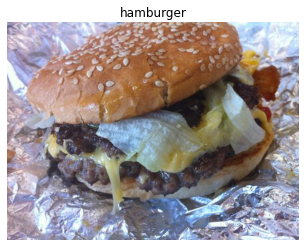

In [ ]:
import random
img=view_random_image(train_dir,target_class=random.choice(class_names))

## 2.Preprocess the Data

In [ ]:
#Paths have already been defiend. Next step is to create a Train,TEst DAta gen
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Set random seed
tf.random.set_seed=42
#Prerpocess the data(Normlized the data)
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

#Import Dird an turn it into batches
train_data=train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    class_mode='categorical',
    seed=42
)

test_data=test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    class_mode='categorical',
    seed=42
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
